In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("Countries.csv")

In [ ]:
data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


Text(0, 0.5, 'Latitude')

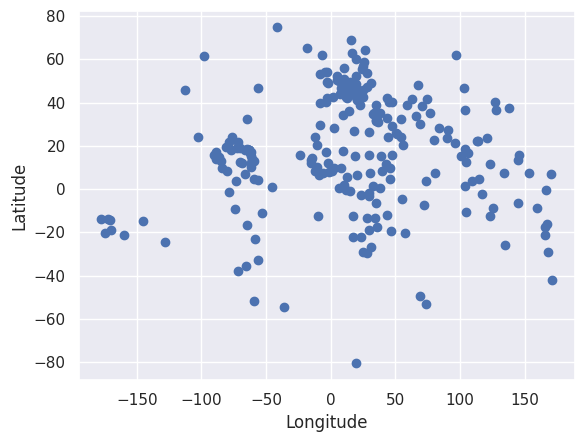

In [ ]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [ ]:
X = data.iloc[:, 1:3]

In [ ]:
X

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [ ]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X_scaled

,Longitude,Latitude
0,-1.171629,-0.175422
1,0.720657,0.628927
2,0.046226,-1.111849
3,-1.075368,0.039797
4,0.081187,0.904683
...,...,...
236,-2.593510,-1.166941
237,0.464368,-0.047553
238,0.151237,-1.742328
239,0.188681,-1.155809


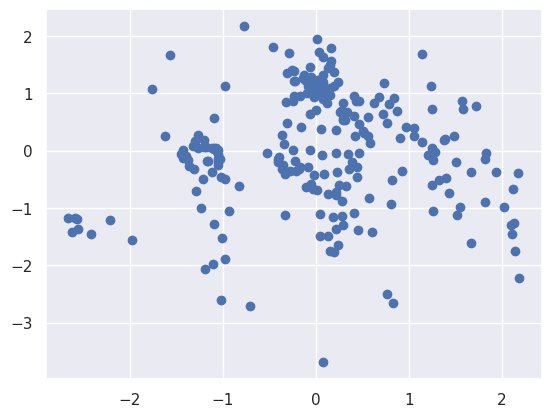

In [ ]:
plt.scatter(X_scaled["Longitude"], X_scaled["Latitude"])

In [ ]:
km = KMeans(n_clusters=3)

In [ ]:
km

KMeans(n_clusters=3)

In [ ]:
km.fit(X)

KMeans(n_clusters=3)

In [ ]:
km

KMeans(n_clusters=3)

In [ ]:
identified_clusters = km.fit_predict(X)

In [ ]:
identified_clusters

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 2, 1, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2,
       1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0,
       2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1,
       1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
data["Cluster"] = identified_clusters

In [ ]:
data

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,0
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


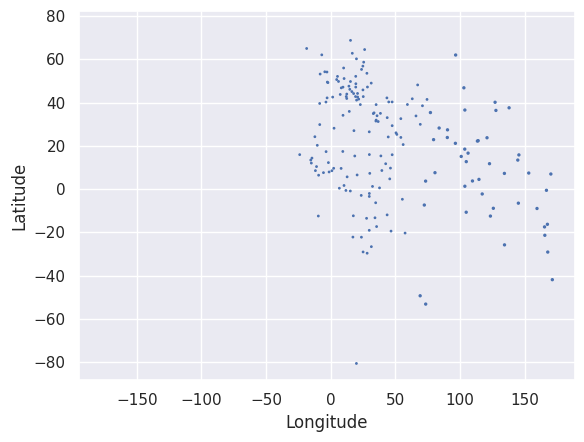

In [ ]:
plt.scatter(data["Longitude"], data["Latitude"], data["Cluster"], cmap="rainbow")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
wcss = []
k_values = range(1,11)
for k in k_values:
  model = KMeans(n_clusters=k)
  model.fit(X)
  wcss.append(model.inertia_)

In [ ]:
wcss

[1413859.6798344278,
 657012.0797586322,
 325254.48120331316,
 300977.573538774,
 218778.39663551844,
 153697.93509810412,
 127997.90597439623,
 103719.8138240018,
 85848.87106137317,
 79190.00798810789]

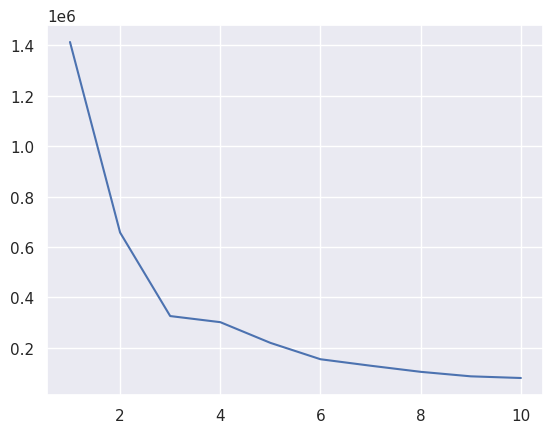

In [ ]:
plt.plot(k_values, wcss)

In [ ]:
model = KMeans(n_clusters=3)
pred = model.fit_predict(X)

In [ ]:
pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1,
       2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 0,
       0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
data["Clusters_After_Elbow"] = pred

In [ ]:
data

,name,Longitude,Latitude,Cluster,Clusters_After_Elbow
0,Aruba,-69.982677,12.520880,0,1
1,Afghanistan,66.004734,33.835231,1,0
2,Angola,17.537368,-12.293361,1,0
3,Anguilla,-63.064989,18.223959,0,1
4,Albania,20.049834,41.142450,1,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,0,1
237,Yemen,47.586762,15.909280,1,0
238,South Africa,25.083901,-29.000341,1,0
239,Zambia,27.774759,-13.458242,1,0


In [ ]:
data.Clusters_After_Elbow.unique()

array([1, 0, 2], dtype=int32)

In [ ]:
c1 = data[data.Clusters_After_Elbow == 0]
c2 = data[data.Clusters_After_Elbow == 1]
c3 = data[data.Clusters_After_Elbow == 2]

In [ ]:
c1

,name,Longitude,Latitude,Cluster,Clusters_After_Elbow
1,Afghanistan,66.004734,33.835231,1,0
2,Angola,17.537368,-12.293361,1,0
4,Albania,20.049834,41.142450,1,0
5,Aland,19.953288,60.214887,1,0
6,Andorra,1.560544,42.542291,1,0
...,...,...,...,...,...
228,Vatican,12.433872,41.901750,1,0
237,Yemen,47.586762,15.909280,1,0
238,South Africa,25.083901,-29.000341,1,0
239,Zambia,27.774759,-13.458242,1,0


In [ ]:
c2

,name,Longitude,Latitude,Cluster,Clusters_After_Elbow
0,Aruba,-69.982677,12.520880,0,1
3,Anguilla,-63.064989,18.223959,0,1
8,Argentina,-65.179807,-35.381349,0,1
10,American Samoa,-170.718026,-14.304460,0,1
14,Antigua and Barb.,-61.794693,17.277500,0,1
...,...,...,...,...,...
230,Venezuela,-66.181841,7.124224,0,1
231,British Virgin Is.,-64.471470,18.525858,0,1
232,U.S. Virgin Is.,-64.803015,17.955006,0,1
235,Wallis and Futuna Is.,-177.348348,-13.887370,0,1


In [ ]:
c3

,name,Longitude,Latitude,Cluster,Clusters_After_Elbow
12,Ashmore and Cartier Is.,123.583838,-12.429932,2,2
13,Fr. S. Antarctic Lands,69.226668,-49.248955,2,2
15,Australia,134.491000,-25.732887,2,2
22,Bangladesh,90.238127,23.867312,2,2
35,Brunei,114.722030,4.519690,2,2
36,Bhutan,90.401882,27.411066,2,2
41,China,103.819074,36.561765,2,2
70,Fiji,165.451954,-17.428580,2,2
74,Micronesia,153.239438,7.452468,2,2
88,Guam,144.767910,13.441656,2,2


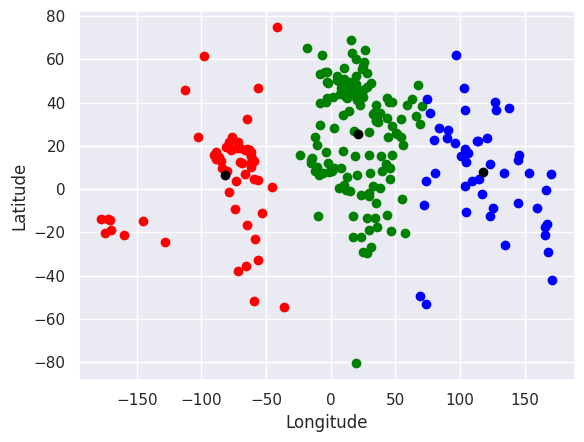

In [ ]:
plt.scatter(c1.Longitude, c1.Latitude, color="green")
plt.scatter(c2.Longitude, c2.Latitude, color="red")
plt.scatter(c3.Longitude, c3.Latitude, color="blue")
plt.scatter(model.cluster_centers_[: , 0], model.cluster_centers_[: , 1], color="black")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
model.cluster_centers_

array([[ 21.43554776,  25.30902689],
       [-81.36774913,   6.6860381 ],
       [117.83854073,   7.74193432]])